In [16]:
# Confirm that the version pymc is 4 or greater

import pymc as pm
print(pm.__version__)
#!conda install seaborn -y

5.27.1


In [1]:
# Imports and Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    dataset = pd.read_csv('Tweets.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: The file 'Tweets.csv' was not found.")
    
except pd.errors.EmptyDataError:
    print("Error: The file 'Tweets.csv' is empty.")
    
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. It might be corrupted.")
    
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Dataset loaded successfully!


In [3]:
chanceofbeingretweeted = 1 / (1 + np.exp(3.592)) # at baseline
chanceofbeingretweeted

np.float64(0.026804896591424356)

In [18]:
print(f"\nDataset Shape: {dataset.shape}")
print(f"\nNumber of Features in Train: {dataset.shape[1]}")
print("\n" + "=" * 60)
print("\n" ,{dataset.info()})
print("\n" + "=" * 60)
missing = dataset.isnull().sum()
missing_pct = (missing / len(dataset)) * 100
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Percentage': missing_pct.values
    }).query('Missing_Count > 0').sort_values('Percentage', ascending=False)
print("\n" + "=" * 60)    
print("\nMissing Values:")
if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
print("\n" + "=" * 60)

print("Full row duplicates:", dataset.duplicated().sum())
print("Duplicate tweet_id:", dataset['tweet_id'].duplicated().sum())
print("Duplicate text:", dataset['text'].duplicated().sum())



Dataset Shape: (14640, 15)

Number of Features in Train: 15

<class 'pandas.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  str    
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   str    
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  str    
 6   airline_sentiment_gold        40 non-null     str    
 7   name                          14640 non-null  str    
 8   negativereason_gold           32 non-null     str    
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  str    
 11  tweet_coord                   1019 non-null   str    
 12  tweet_cre

In [21]:
# Inspect duplicates: 
dupes = dataset[dataset.duplicated(keep=False)]
dupes = dupes.sort_values(by=dataset.columns.tolist())
dupes

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12001,570272018840428544,neutral,1.0,NaN,NaN,American,NaN,pokecrastinator,NaN,0,@AmericanAir I thought all those planes were r...,NaN,2015-02-24 09:20:19 -0800,United States,Mountain Time (US & Canada)
12162,570272018840428544,neutral,1.0,NaN,NaN,American,NaN,pokecrastinator,NaN,0,@AmericanAir I thought all those planes were r...,NaN,2015-02-24 09:20:19 -0800,United States,Mountain Time (US & Canada)
11998,570272880556011520,positive,1.0,NaN,NaN,American,NaN,ESPartee,NaN,0,"@americanair new plane, #gogo, easy power for ...","[0.0, 0.0]",2015-02-24 09:23:44 -0800,"alexandria, va",Eastern Time (US & Canada)
12159,570272880556011520,positive,1.0,NaN,NaN,American,NaN,ESPartee,NaN,0,"@americanair new plane, #gogo, easy power for ...","[0.0, 0.0]",2015-02-24 09:23:44 -0800,"alexandria, va",Eastern Time (US & Canada)
11997,570273710210469888,positive,1.0,NaN,NaN,American,NaN,Mtts28,NaN,0,@AmericanAir These are some awesome photos. Th...,NaN,2015-02-24 09:27:02 -0800,Virginia,Eastern Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12063,570303383782989824,neutral,1.0,NaN,NaN,American,NaN,trentgillaspie,NaN,0,.@AmericanAir just disappointed with the Fligh...,NaN,2015-02-24 11:24:57 -0800,"Austin, but often Denver",Mountain Time (US & Canada)
11898,570305051819941889,neutral,1.0,NaN,NaN,American,NaN,Chandrafaythe,NaN,0,@AmericanAir my flight got Cancelled Flightled...,NaN,2015-02-24 11:31:34 -0800,NaN,Quito
12059,570305051819941889,neutral,1.0,NaN,NaN,American,NaN,Chandrafaythe,NaN,0,@AmericanAir my flight got Cancelled Flightled...,NaN,2015-02-24 11:31:34 -0800,NaN,Quito
11879,570308309682675712,negative,1.0,Customer Service Issue,1.0,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I even consider continu...,NaN,2015-02-24 11:44:31 -0800,NaN,Quito


In [22]:
# Drop full row duplicates
dataset = dataset.drop_duplicates(keep="first")

print("Full row duplicates:", dataset.duplicated().sum())
print("Duplicate tweet_id:", dataset['tweet_id'].duplicated().sum())
print("Duplicate text:", dataset['text'].duplicated().sum())

Full row duplicates: 0
Duplicate tweet_id: 119
Duplicate text: 177


In [23]:
dataset["_non_nulls"] = dataset.notna().sum(axis=1)
dataset = (dataset.sort_values(["tweet_id", "_non_nulls"], ascending=[True, False])
                    .drop_duplicates(subset=["tweet_id"], keep="first")
                    .drop(columns=["_non_nulls"]))

In [24]:
print("Duplicate tweet_id:", dataset['tweet_id'].duplicated().sum())
print("Duplicate text:", dataset['text'].duplicated().sum())

Duplicate tweet_id: 0
Duplicate text: 58


Keeping the duplicate text as it might be important for retweet probability, identitical texts might have different retweet ooutcomes. 

In [28]:
dataset["y_retweeted"] = (dataset["retweet_count"] >= 1).astype(int)
print(dataset["y_retweeted"].value_counts())


y_retweeted
0    13720
1      765
Name: count, dtype: int64


In [30]:
dataset["retweet_count"].describe()

count    14485.000000
mean         0.083397
std          0.749632
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         44.000000
Name: retweet_count, dtype: float64

In [34]:
dataset.groupby("airline")["y_retweeted"].mean().sort_values()

airline
American          0.028418
Virgin America    0.029762
Southwest         0.035537
US Airways        0.040851
Delta             0.041404
United            0.099163
Name: y_retweeted, dtype: float64

In [36]:
dataset.groupby("airline_sentiment")["y_retweeted"].mean()

airline_sentiment
negative    0.065464
neutral     0.030659
positive    0.032618
Name: y_retweeted, dtype: float64

In [43]:
dataset["tweet_created"] = pd.to_datetime(dataset["tweet_created"])
dataset["hour"] = dataset["tweet_created"].dt.hour
dataset["weekday"] = dataset["tweet_created"].dt.weekday

print(dataset.groupby("hour")["y_retweeted"].mean())
dataset.groupby("weekday")["y_retweeted"].mean()

hour
0     0.007692
1     0.081081
2     0.040230
3     0.022222
4     0.035422
5     0.029350
6     0.017713
7     0.033505
8     0.041081
9     0.040966
10    0.057421
11    0.057447
12    0.046229
13    0.058889
14    0.047568
15    0.067259
16    0.077657
17    0.071618
18    0.082667
19    0.069733
20    0.061462
21    0.046512
22    0.071918
23    0.046632
Name: y_retweeted, dtype: float64


weekday
0    0.054125
1    0.034933
2    0.044643
3    0.052326
4    0.088667
5    0.064868
6    0.046860
Name: y_retweeted, dtype: float64

In [46]:
print(dataset.groupby("user_timezone")["y_retweeted"].mean().sort_values())


user_timezone
Abu Dhabi              0.000000
Adelaide               0.000000
America/Atikokan       0.000000
America/Boise          0.000000
America/Los_Angeles    0.000000
                         ...   
Caracas                0.222222
Stockholm              0.250000
Paris                  0.280000
Islamabad              0.500000
Pretoria               1.000000
Name: y_retweeted, Length: 85, dtype: float64


In [39]:
print(f"\nSentiment Distribution:")
print(dataset['airline_sentiment'].value_counts().sort_index())
print(f"\nSentiment Proportions:")
print(dataset['airline_sentiment'].value_counts(normalize=True).sort_index())

total_by_airline = dataset['airline'].value_counts()
print("\nTotal Tweets by Airline:")
print(total_by_airline)

mask = dataset['airline_sentiment'] == 'negative'
negative_tweets_only = dataset[mask]
airline_column = negative_tweets_only['airline']
negative_by_airline = airline_column.value_counts()
print("\nNegative Tweets by Airline:")
print(negative_by_airline)

# From all the total tweets for each airline, what proportion is negative
airline_sentiment = pd.crosstab(
    dataset['airline'], 
    dataset['airline_sentiment'], 
    normalize='index'
) * 100

print("\nSentiment Proportion by Airline (%):")
print(airline_sentiment.round(2))


Sentiment Distribution:
airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

Sentiment Proportions:
airline_sentiment
negative    0.626913
neutral     0.211680
positive    0.161407
Name: proportion, dtype: float64

Total Tweets by Airline:
airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

Negative Tweets by Airline:
airline
United            2633
US Airways        2263
American          1960
Southwest         1186
Delta              955
Virgin America     181
Name: count, dtype: int64

Sentiment Proportion by Airline (%):
airline_sentiment  negative  neutral  positive
airline                                       
American              71.04    16.78     12.18
Delta                 42.98    32.54     24.48
Southwest             49.01    27.44     23.55
US Airways            77.69    13.08      9.23
United                6

In [4]:
dataset["retweet_count"].describe()

count    14640.000000
mean         0.082650
std          0.745778
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         44.000000
Name: retweet_count, dtype: float64

In [6]:
dataset["retweet_count"].value_counts().head(10)

retweet_count
0     13873
1       640
2        66
3        22
4        17
5         5
7         3
6         3
22        2
18        1
Name: count, dtype: int64

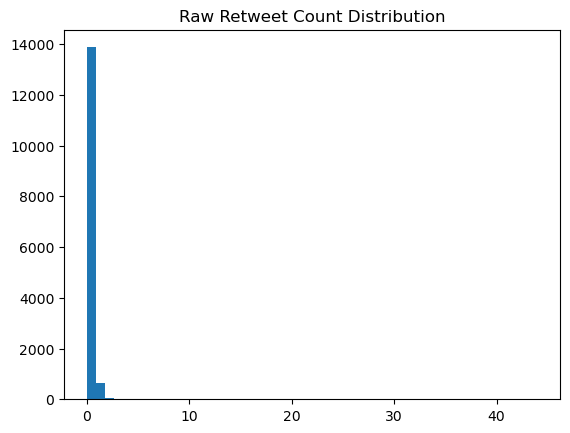

In [8]:
plt.hist(dataset["retweet_count"], bins=50)
plt.title("Raw Retweet Count Distribution")
plt.show()

In [10]:
(dataset["retweet_count"] == 0).mean()

np.float64(0.9476092896174864)

In [14]:
dataset.groupby("airline_sentiment")["retweet_count"].describe()

,count,mean,std,min,25%,50%,75%,max
airline_sentiment,,,,,,,,
negative,9178.0,0.093375,0.792865,0.0,0.0,0.0,0.0,44.0
neutral,3099.0,0.060987,0.658037,0.0,0.0,0.0,0.0,28.0
positive,2363.0,0.069403,0.659914,0.0,0.0,0.0,0.0,22.0


In [15]:
dataset.groupby("airline_sentiment")["log_retweets"].mean()

airline_sentiment
negative    0.050902
neutral     0.028327
positive    0.030960
Name: log_retweets, dtype: float64

<Axes: title={'center': 'log_retweets'}, xlabel='airline_sentiment'>

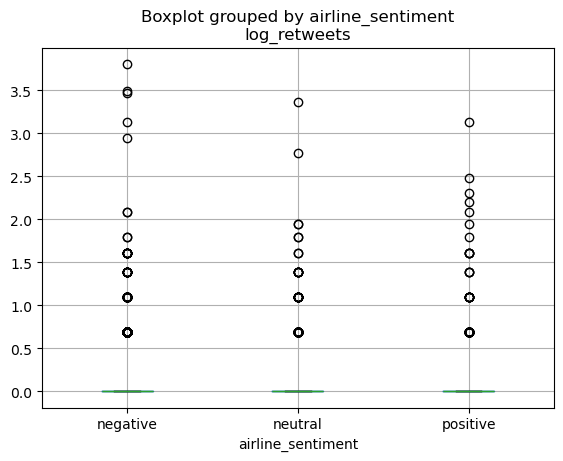

In [16]:
dataset.boxplot(column="log_retweets", by="airline_sentiment")

In [17]:
dataset.groupby("airline")["retweet_count"].mean().sort_values()

airline
American          0.042407
Virgin America    0.051587
Southwest         0.059917
US Airways        0.085479
United            0.110152
Delta             0.113411
Name: retweet_count, dtype: float64

In [18]:
dataset.groupby("airline")["log_retweets"].mean().sort_values()

airline
American          0.024025
Virgin America    0.028054
Southwest         0.031009
US Airways        0.034391
Delta             0.042899
United            0.072516
Name: log_retweets, dtype: float64

Total negative tweets: 9178
Negative tweets with a reason: 9178
Negative tweets WITHOUT a reason: 0
NEGATIVE REASONS - COUNTS:
negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64

NEGATIVE REASONS - PERCENTAGES:
negativereason
Customer Service Issue         31.7
Late Flight                    18.1
Can't Tell                     13.0
Cancelled Flight                9.2
Lost Luggage                    7.9
Bad Flight                      6.3
Flight Booking Problems         5.8
Flight Attendant Complaints     5.2
longlines                       1.9
Damaged Luggage                 0.8
Name: proportion, dtype: float64


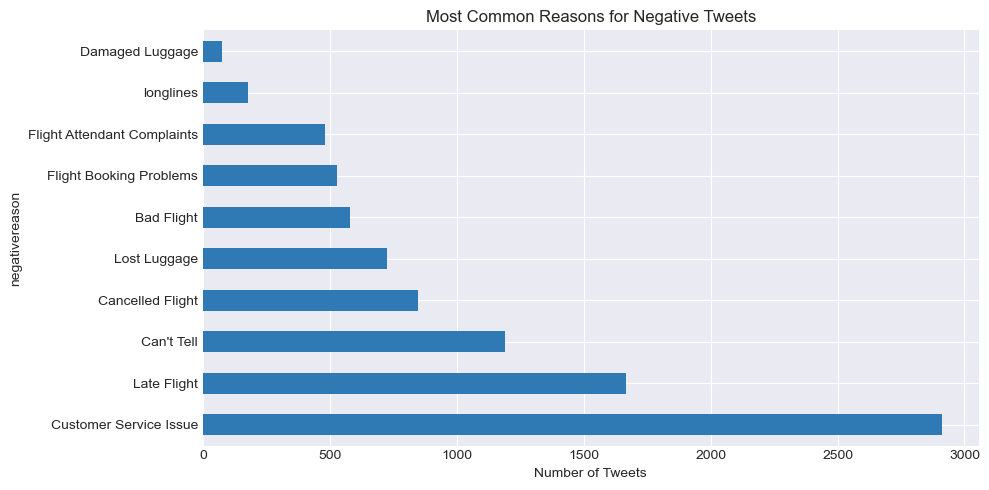

In [41]:
# Reasoning EDA: negative tweets
negative_tweets = dataset[dataset['airline_sentiment'] == 'negative'].copy()
print(f"Total negative tweets: {len(negative_tweets)}")
print(f"Negative tweets with a reason: {negative_tweets['negativereason'].count()}")
print(f"Negative tweets WITHOUT a reason: {negative_tweets['negativereason'].isna().sum()}")

# Count how many times each reason appears
reason_counts = negative_tweets['negativereason'].value_counts()
print("NEGATIVE REASONS - COUNTS:")
print(reason_counts)
print("\n" + "="*50)

# Calculate percentages
reason_percentages = negative_tweets['negativereason'].value_counts(normalize=True) * 100
print("NEGATIVE REASONS - PERCENTAGES:")
print(reason_percentages.round(1))


plt.figure(figsize=(10,5))
reason_counts.plot(kind='barh')
plt.title('Most Common Reasons for Negative Tweets')
plt.xlabel('Number of Tweets')
plt.tight_layout()
plt.show()


In [44]:
# Create a table showing which airlines get which complaints
reason_by_airline = pd.crosstab(
    negative_tweets['airline'], 
    negative_tweets['negativereason']
)

print("COMPLAINTS BY AIRLINE:")
print(reason_by_airline)

# Let's find the TOP complaint for each airline
for airline in reason_by_airline.index:
    top_complaint = reason_by_airline.loc[airline].idxmax()
    top_count = reason_by_airline.loc[airline].max()
    print(f"{airline}'s most common complaint: {top_complaint} ({top_count} tweets)")

COMPLAINTS BY AIRLINE:
negativereason  Bad Flight  Can't Tell  Cancelled Flight  \
airline                                                    
American                87         198               246   
Delta                   64         186                51   
Southwest               90         159               162   
US Airways             104         246               189   
United                 216         379               181   
Virgin America          19          22                18   

negativereason  Customer Service Issue  Damaged Luggage  \
airline                                                   
American                           768               12   
Delta                              199               11   
Southwest                          391               14   
US Airways                         811               11   
United                             681               22   
Virgin America                      60                4   

negativereason  Flight 

Top 5 complaints: ['Customer Service Issue', 'Late Flight', "Can't Tell", 'Cancelled Flight', 'Lost Luggage']


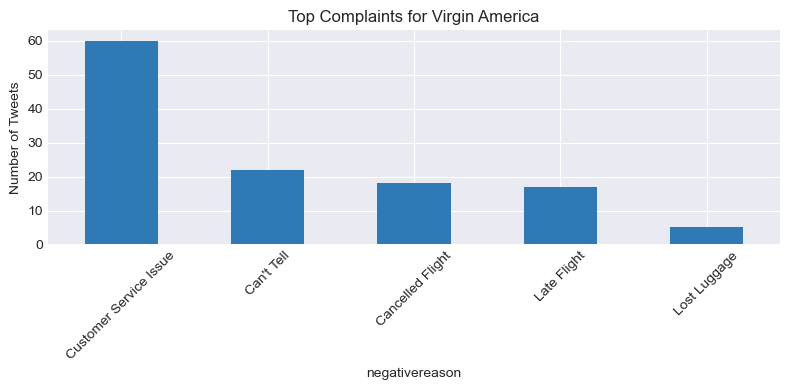

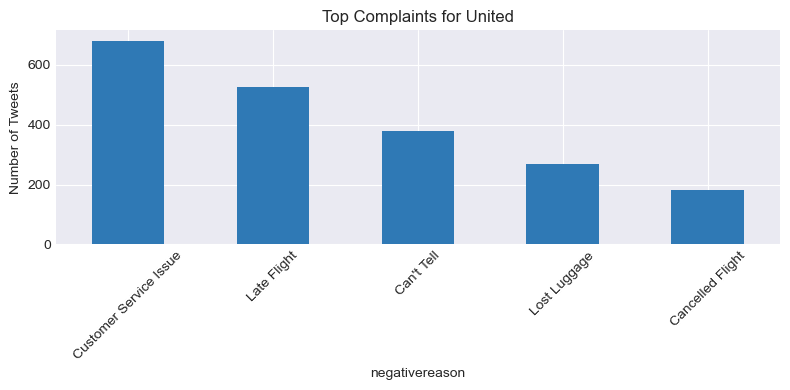

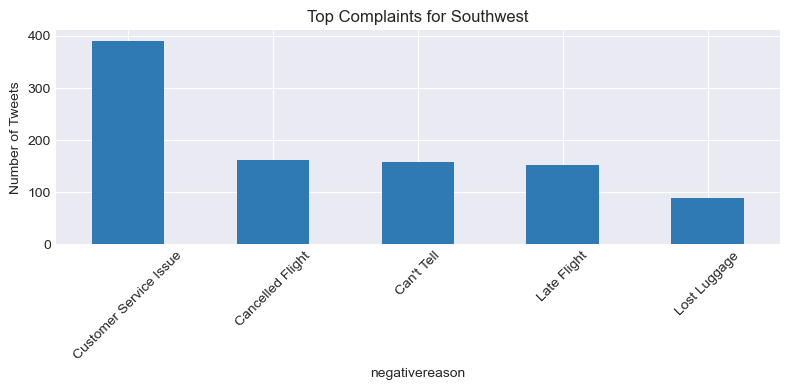

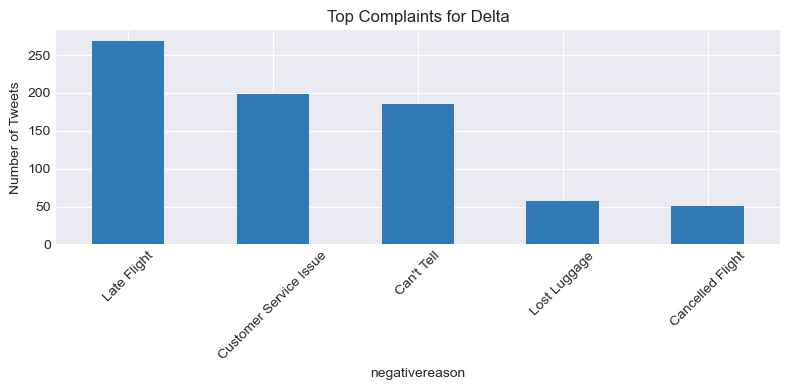

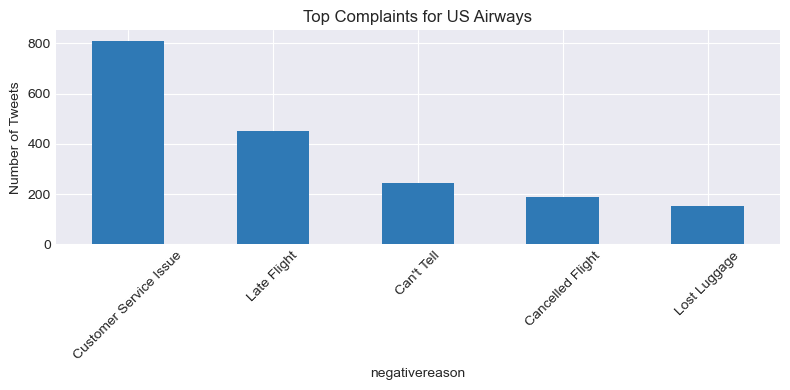

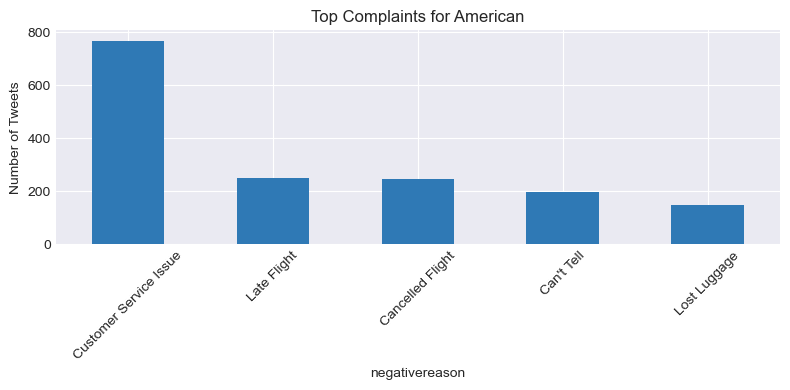

In [45]:
# Let's pick the top 5 complaints overall
top_5_reasons = reason_counts.head(5).index.tolist()
print("Top 5 complaints:", top_5_reasons)

# Create a simple bar chart for each airline showing these top 5
for airline in negative_tweets['airline'].unique():
    # Get data for this airline
    airline_data = negative_tweets[negative_tweets['airline'] == airline]
    
    # Count complaints for this airline (only top 5 reasons)
    complaint_counts = airline_data['negativereason'].value_counts()
    complaint_counts = complaint_counts[complaint_counts.index.isin(top_5_reasons)]
    
    # Make the chart
    plt.figure(figsize=(8,4))
    complaint_counts.plot(kind='bar')
    plt.title(f'Top Complaints for {airline}')
    plt.ylabel('Number of Tweets')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Average confidence score for each reason:
negativereason
Bad Flight                     0.632
Can't Tell                     0.630
Cancelled Flight               0.783
Customer Service Issue         0.780
Damaged Luggage                0.733
Flight Attendant Complaints    0.660
Flight Booking Problems        0.607
Late Flight                    0.769
Lost Luggage                   0.813
longlines                      0.594
Name: negativereason_confidence, dtype: float64


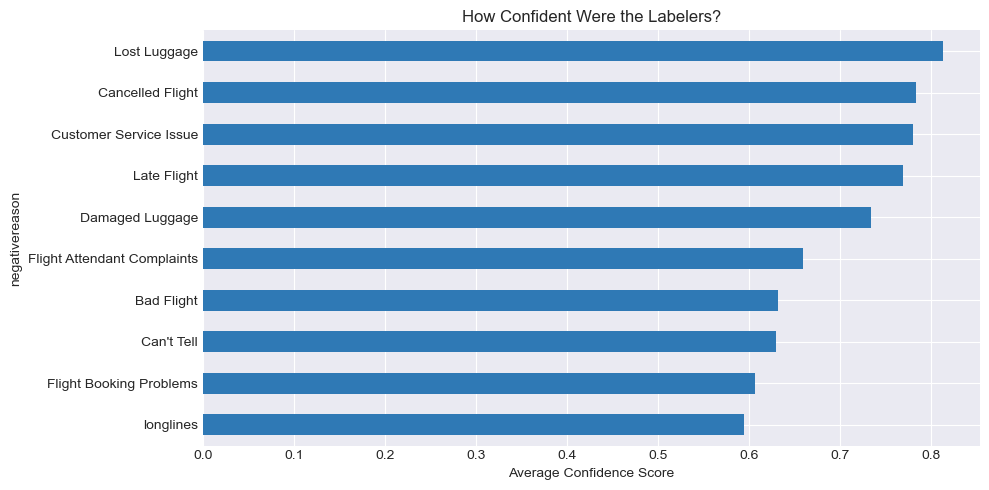

In [46]:
# See how confident the labelers were for each reason
confidence_by_reason = negative_tweets.groupby('negativereason')['negativereason_confidence'].mean()
print("Average confidence score for each reason:")
print(confidence_by_reason.round(3))

# Simple bar chart of confidence
plt.figure(figsize=(10,5))
confidence_by_reason.dropna().sort_values().plot(kind='barh')
plt.title('How Confident Were the Labelers?')
plt.xlabel('Average Confidence Score')
plt.tight_layout()
plt.show()

In [48]:
# Add a column for tweet length (number of characters)
negative_tweets['tweet_length'] = negative_tweets['text'].str.len()

# Check average tweet length by reason
length_by_reason = negative_tweets.groupby('negativereason')['tweet_length'].mean()
print("Average tweet length by reason:")
print(length_by_reason.round(0))

Average tweet length by reason:
negativereason
Bad Flight                     117.0
Can't Tell                      98.0
Cancelled Flight               128.0
Customer Service Issue         114.0
Damaged Luggage                120.0
Flight Attendant Complaints    120.0
Flight Booking Problems        118.0
Late Flight                    114.0
Lost Luggage                   114.0
longlines                      112.0
Name: tweet_length, dtype: float64


In [49]:
print("="*60)
print("SUMMARY STATISTICS FOR NEGATIVE REASONS")
print("="*60)

# Most and least common
most_common = reason_counts.idxmax()
most_common_count = reason_counts.max()
least_common = reason_counts.idxmin()
least_common_count = reason_counts.min()

print(f"Most common complaint: '{most_common}' ({most_common_count} tweets, {most_common_count/9178*100:.1f}%)")
print(f"Least common complaint: '{least_common}' ({least_common_count} tweets, {least_common_count/9178*100:.1f}%)")

# Airline with most complaints overall
airline_with_most = negative_tweets['airline'].value_counts().idxmax()
airline_most_count = negative_tweets['airline'].value_counts().max()
print(f"\nAirline with most negative tweets: {airline_with_most} ({airline_most_count})")

# For that airline, what's their top complaint?
airline_data = negative_tweets[negative_tweets['airline'] == airline_with_most]
airline_top = airline_data['negativereason'].value_counts().idxmax()
airline_top_count = airline_data['negativereason'].value_counts().max()
print(f"  Their top complaint: {airline_top} ({airline_top_count} tweets)")

SUMMARY STATISTICS FOR NEGATIVE REASONS
Most common complaint: 'Customer Service Issue' (2910 tweets, 31.7%)
Least common complaint: 'Damaged Luggage' (74 tweets, 0.8%)

Airline with most negative tweets: United (2633)
  Their top complaint: Customer Service Issue (681 tweets)
